In [266]:
import pandas
import glob
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
%matplotlib inline

# Load all Sharpr data

In [307]:
from collections import OrderedDict

dataMatrix = open('../data/processed_data/sharprFullDataMatrix.tsv')
header = dataMatrix.readline()
header = header.strip().split('\t')
cols_to_indices = {col: header.index(col) for col in header}
# print cols_to_indices
print header

rep1Names = ['k562_minp_rep1_count', 'k562_sv40p_rep1_count',
             'hepg2_minp_rep1_count', 'hepg2_sv40p_rep1_count',
             'k562_minp_rep1_norm', 'k562_sv40p_rep1_norm',
             'hepg2_minp_rep1_norm', 'hepg2_sv40p_rep1_norm'
            ]
rep2Names = ['k562_minp_rep2_count', 'k562_sv40p_rep2_count',
             'hepg2_minp_rep2_count', 'hepg2_sv40p_rep2_count',
             'k562_minp_rep2_norm', 'k562_sv40p_rep2_norm',
             'hepg2_minp_rep2_norm', 'hepg2_sv40p_rep2_norm'
            ]
avgNames = ['k562_minp_avg_count', 'k562_sv40p_avg_count',
             'hepg2_minp_avg_count', 'hepg2_sv40p_avg_count',
             'k562_minp_avg_norm', 'k562_sv40p_avg_norm',
             'hepg2_minp_avg_norm', 'hepg2_sv40p_avg_norm'
            ]
expNames = ['k562_minp_count', 'k562_sv40p_count',
            'hepg2_minp_count', 'hepg2_sv40p_count',
            'k562_minp_norm', 'k562_sv40p_norm',
            'hepg2_minp_norm', 'hepg2_sv40p_norm'
            ]
dnaNames = ['minp', 'sv40p']
names = []
designs = []
# rnaRep1, rnaRep2, rnaAvg, dna = [OrderedDict() for i in range(4)]
rnaRep1 = OrderedDict([(exp, []) for exp in expNames])
rnaRep2 = OrderedDict([(exp, []) for exp in expNames])
rnaAvg = OrderedDict([(exp, []) for exp in expNames])
dna = OrderedDict([(exp, []) for exp in dnaNames])
j = 0
for line in dataMatrix:
    line = line.strip().split('\t')
#     if j < 1:
#         print line
#         j += 1
#     else:
#         break
    names.append(line[cols_to_indices['name']])
    designs.append(line[cols_to_indices['design']])
    for data_dict in [rnaRep1, rnaRep2, rnaAvg, dna]:
        for (i, measurement) in enumerate(data_dict.keys()):
            if data_dict is rnaRep1:
                measurement_rep = rep1Names[i]
            if data_dict is rnaRep2:
                measurement_rep = rep2Names[i]
            if data_dict is rnaAvg:
                measurement_rep = avgNames[i]
            if data_dict is dna:
                if measurement == 'minp':
                    measurement_rep = 'dna_minp_count'
                else:
                    measurement_rep = 'dna_sv40p_count'
#             if measurement == "k562_minp_norm":
#                 print measurement_rep
#                 print cols_to_indices[measurement_rep]
            data_dict[measurement].append(float(line[cols_to_indices[measurement_rep]]))

['name', 'chrom', 'center_coord', 'sequence', 'barcode', 'chromatin_state', 'design', 'k562_minp_rep1_count', 'k562_minp_rep2_count', 'k562_minp_avg_count', 'k562_sv40p_rep1_count', 'k562_sv40p_rep2_count', 'k562_sv40p_avg_count', 'hepg2_minp_rep1_count', 'hepg2_minp_rep2_count', 'hepg2_minp_avg_count', 'hepg2_sv40p_rep1_count', 'hepg2_sv40p_rep2_count', 'hepg2_sv40p_avg_count', 'k562_minp_rep1_norm', 'k562_minp_rep2_norm', 'k562_minp_avg_norm', 'k562_sv40p_rep1_norm', 'k562_sv40p_rep2_norm', 'k562_sv40p_avg_norm', 'hepg2_minp_rep1_norm', 'hepg2_minp_rep2_norm', 'hepg2_minp_avg_norm', 'hepg2_sv40p_rep1_norm', 'hepg2_sv40p_rep2_norm', 'hepg2_sv40p_avg_norm', 'dna_minp_count', 'dna_sv40p_count']


In [308]:
rnaRep1 = OrderedDict([(measurement, np.array(rnaRep1[measurement])) for measurement in rnaRep1.keys()])
rnaRep2 = OrderedDict([(measurement, np.array(rnaRep2[measurement])) for measurement in rnaRep2.keys()])
rnaAvg = OrderedDict([(measurement, np.array(rnaAvg[measurement])) for measurement in rnaAvg.keys()])
dna = OrderedDict([(measurement, np.array(dna[measurement])) for measurement in dna.keys()])

print type(dna['minp'])

<type 'numpy.ndarray'>


# Plot RNA count & normalized signal replicate correlations

In [78]:
def curate_rna(rna, dna, min_plasmids = 20):
    fragments_above_min = dna > min_plasmids
    return rna[fragments_above_min]

def curate_dna(dna, min_plasmids = 20):
    return dna[dna > min_plasmids]

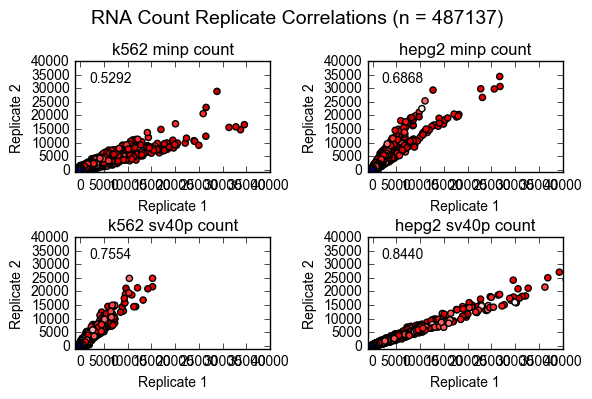

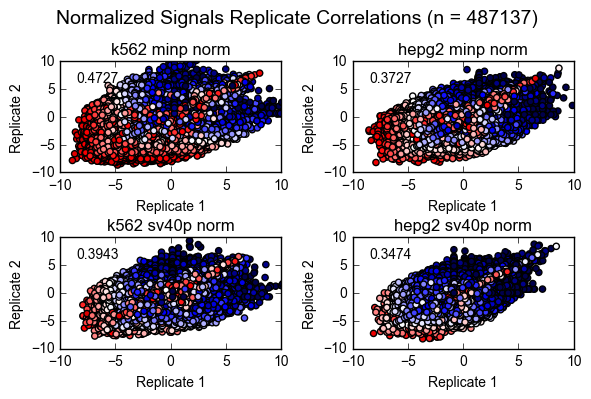

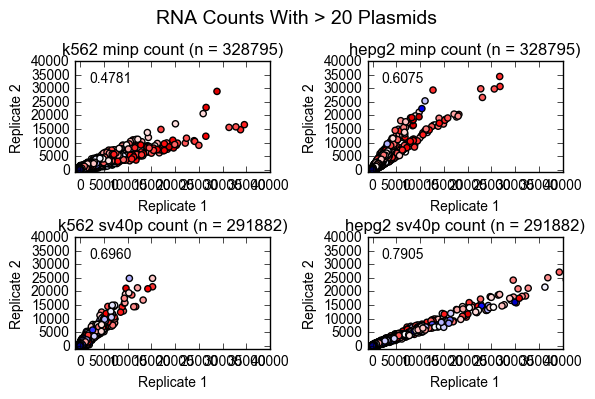

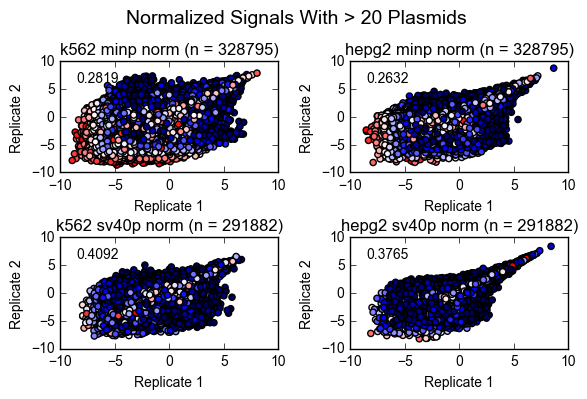

In [16]:
f, ax = plt.subplots(2, 2)
for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(' '.join(exp.split('_')))
    ax[i%2, i/2].scatter(rnaRep1[exp],
                         rnaRep2[exp],
                         c = np.log2(dna[promoter] + 1),
                         cmap = 'seismic')
    spear = stats.spearmanr(rnaRep1[exp],
                            rnaRep2[exp])[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-1000, 40000])
    ax[i%2, i/2].set_ylim([-1000, 40000])
    ax[i%2, i/2].text(0.18, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=0.5)
    
plt.suptitle("RNA Count Replicate Correlations (n = %d)" % len(rnaRep1[exp]), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('../plots/rnaCountsReplicates.png')
plt.show()

f, ax = plt.subplots(2, 2)
for (i, exp) in enumerate(expNames[4:]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(' '.join(exp.split('_')))
    ax[i%2, i/2].scatter(rnaRep1[exp],
                         rnaRep2[exp],
                         c = np.log2(dna[promoter] + 1),
                         cmap = 'seismic')
    spear = stats.spearmanr(rnaRep1[exp],
                            rnaRep2[exp])[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-10, 10])
    ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=0.5)
    
plt.suptitle("Normalized Signals Replicate Correlations (n = %d)" % len(rnaRep1[exp]), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('../plots/normSignalsReplicates.png')
plt.show()

f, ax = plt.subplots(2, 2)
min_plasmids = 20

for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    rna1 = curate_rna(rnaRep1[exp], dna[promoter], min_plasmids)
#     print "Number of datapoints with > %d plasmids = %d" % (min_plasmids, len(rna1))
    rna2 = curate_rna(rnaRep2[exp], dna[promoter], min_plasmids)
    ax[i%2, i/2].set_title(' '.join(exp.split('_')) + " (n = " + str(len(rna1)) + ")")
    ax[i%2, i/2].scatter(rna1,
                         rna2,
                         c = np.log2(curate_dna(dna[promoter], min_plasmids)),
                         cmap = 'seismic'
                         )
    spear = stats.spearmanr(rna1,
                            rna2)[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-1000, 40000])
    ax[i%2, i/2].set_ylim([-1000, 40000])
    ax[i%2, i/2].text(0.18, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=0.5)
    
plt.suptitle("RNA Counts With > %d Plasmids" % (min_plasmids), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('../plots/rnaCountsWith20Plasmids.png.png')
plt.show()

f, ax = plt.subplots(2, 2)
min_plasmids = 20

for (i, exp) in enumerate(expNames[4:]):
    promoter = exp.split('_')[1]
    rna1 = curate_rna(rnaRep1[exp], dna[promoter], min_plasmids)
#     print "Number of datapoints with > %d plasmids = %d" % (min_plasmids, len(rna1))
    rna2 = curate_rna(rnaRep2[exp], dna[promoter], min_plasmids)
    ax[i%2, i/2].set_title(' '.join(exp.split('_')) + " (n = " + str(len(rna1)) + ")")
    ax[i%2, i/2].scatter(rna1,
                         rna2,
                         c = np.log2(curate_dna(dna[promoter], min_plasmids)),
                         cmap = 'seismic'
                         )
    spear = stats.spearmanr(rna1,
                            rna2)[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-10, 10])
    ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=0.5)
    
plt.suptitle("Normalized Signals With > %d Plasmids" % (min_plasmids), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('../plots/normSignalsWith20Plasmids.png')
plt.show()

# Plot Spearman correlations vs. plasmid threshold

In [17]:
import itertools
from scipy.stats import spearmanr

percentiles = np.arange(0, 100, 1)
thresholds = np.ndarray(shape = (len(percentiles)))
numFragmentsByThreshold = np.ndarray(shape = (len(percentiles)))
corrs = np.ndarray(shape = (len(percentiles), 4))

for (i, percentile) in enumerate(percentiles):
    for (j, promoter) in enumerate(['minp', 'sv40p']):
        plasmid_threshold = np.percentile(dna[promoter], percentile, interpolation = 'lower')
#         print("Plasmid threshold = %d" % plasmid_threshold)
        thresholds[i] = plasmid_threshold
        for (k, ct) in enumerate(['k562', 'hepg2']): 
            exp = '_'.join([ct, promoter, 'norm'])
            rna1 = curate_rna(rnaRep1[exp], dna[promoter], plasmid_threshold)
            rna2 = curate_rna(rnaRep2[exp], dna[promoter], plasmid_threshold)
            numFragmentsByThreshold[i] = len(rna1)
            corrs[i][k*2 + j] = spearmanr(rna1, rna2)[0]

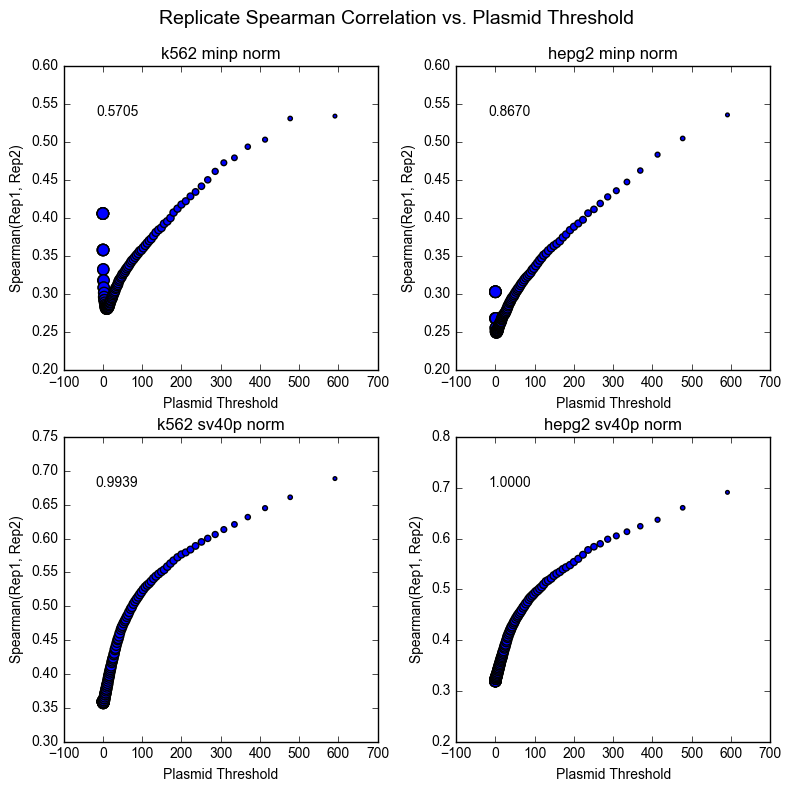

In [27]:
f, ax = plt.subplots(2, 2, figsize=(8,8))

for (i, (ct, p)) in enumerate(itertools.product(['k562', 'hepg2'], ['minp', 'sv40p'])):
    ax[i%2, i/2].set_title(' '.join([ct, p, 'norm']))
    ax[i%2, i/2].scatter(thresholds,
                         corrs[:, i],
                         s = (numFragmentsByThreshold + 1)**0.5 / 10
                         )
    spear = spearmanr(thresholds,
                      corrs[:, i])[0]
    ax[i%2, i/2].set_xlabel('Plasmid Threshold')
    ax[i%2, i/2].set_ylabel('Spearman(Rep1, Rep2)')
#     ax[i%2, i/2].set_xlim([-10, 10])
#     ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=1.5)
f.subplots_adjust(wspace=0.5)
    
f.suptitle("Replicate Spearman Correlation vs. Plasmid Threshold", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.91)
plt.savefig('../plots/replicateCorrVsPlasmidThresholds.png')
plt.show()

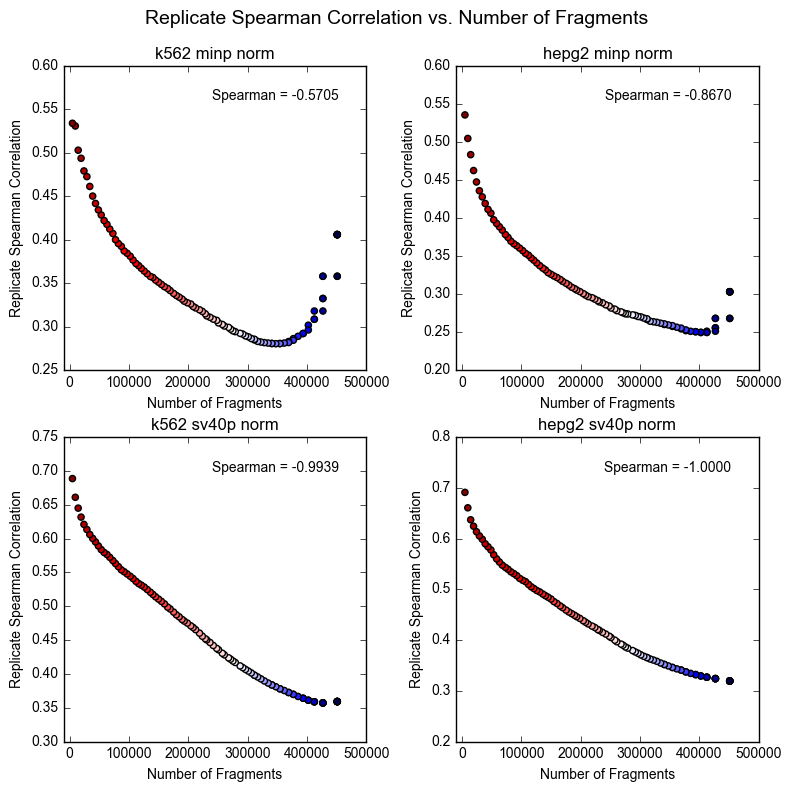

In [28]:
f, ax = plt.subplots(2, 2, figsize = (8, 8))

for (i, (ct, p)) in enumerate(itertools.product(['k562', 'hepg2'], ['minp', 'sv40p'])):
    ax[i%2, i/2].set_title(' '.join([ct, p, 'norm']))
    ax[i%2, i/2].scatter(numFragmentsByThreshold,
                         corrs[:, i],
                         c = np.log2(thresholds + 1),
                         cmap = 'seismic'
                         )
    spear = spearmanr(numFragmentsByThreshold,
                      corrs[:, i])[0]
    ax[i%2, i/2].set_xlabel('Number of Fragments')
    ax[i%2, i/2].set_ylabel('Replicate Spearman Correlation')
    ax[i%2, i/2].set_xlim([-10000, None])
#     ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.7, 0.9, 'Spearman = %.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)
#     plt.ticklabel_format(style='sci', axis='x')

f.subplots_adjust(hspace=0.7)
f.subplots_adjust(wspace=0.5)
    
f.suptitle("Replicate Spearman Correlation vs. Number of Fragments", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.91)
plt.savefig('../plots/replicateCorrVsNumFragments.png')
plt.show()

# Quantile / DESeq normalization

In [156]:
import numpy as np
from scipy.stats import rankdata, gmean, tmean

def quantile_normalize(data):
    data_ranked = np.array([(rankdata(arr, method = 'min') - 1) for arr in data])
    data_sorted = np.array([np.sort(arr) for arr in data])
    average_by_rank = np.mean(data_sorted, axis = 0)
    data_normed = np.array([np.take(average_by_rank, ranks) for ranks in data_ranked])
    return data_normed

def deseq_normalize(data):
#     count_gmean_ratios = data / gmean(data, axis=0) # issue w/ negative geo means
    count_mean_ratios = data / gmean(data, axis=0)
    data_normed = np.ndarray(shape = data.shape)
    size_factor = np.median(count_mean_ratios, axis = 1)
    for (i, sample) in enumerate(data):
        data_normed[i] = sample * size_factor[i]
    return data_normed

In [147]:
rep1_lfc = np.log2(rnaRep1['k562_minp_count'] + 1) # - np.log2(dna['minp'] + 1) + 1e-9
rep2_lfc = np.log2(rnaRep2['k562_minp_count'] + 1) # - np.log2(dna['minp'] + 1) + 1e-9
data = np.array([rep1_lfc, rep2_lfc])
total_reads_normed_data = [rep1_lfc - np.log2(np.sum(rnaRep1['k562_minp_count'])) + np.log2(np.sum(dna['minp'])),
                           rep2_lfc - np.log2(np.sum(rnaRep2['k562_minp_count'])) + np.log2(np.sum(dna['minp']))]
quantile_normed_data = quantile_normalize(data) - np.log2(dna['minp'] + 1)
deseq_normed_data = deseq_normalize(data) - np.log2(dna['minp'] + 1)
print spearmanr(data[0], data[1])
print np.mean(data[0]), np.std(data[0])
print np.mean(data[1]), np.std(data[1])
print spearmanr(total_reads_normed_data[0], total_reads_normed_data[1])
print np.mean(total_reads_normed_data[0]), np.std(total_reads_normed_data[0])
print np.mean(total_reads_normed_data[1]), np.std(total_reads_normed_data[1])
print spearmanr(quantile_normed_data[0], quantile_normed_data[1])
print np.mean(quantile_normed_data[0]), np.std(quantile_normed_data[0])
print np.mean(quantile_normed_data[1]), np.std(quantile_normed_data[1])
print spearmanr(deseq_normed_data[0], deseq_normed_data[1])
print np.mean(deseq_normed_data[0]), np.std(deseq_normed_data[0])
print np.mean(deseq_normed_data[1]), np.std(deseq_normed_data[1])

/home/users/rmovva/.local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in divide
/home/users/rmovva/.local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


SpearmanrResult(correlation=0.52916498488708053, pvalue=0.0)
2.76412072451 2.78380527252
1.97027828857 2.56967549867
SpearmanrResult(correlation=0.52916498488708053, pvalue=0.0)
3.81878081789 2.78380527252
3.73845700514 2.56967549867
SpearmanrResult(correlation=0.47342117734471251, pvalue=0.0)
-3.03704430436 2.23523345919
-3.13008227247 2.465177239


ValueError: The input must have at least 3 entries!

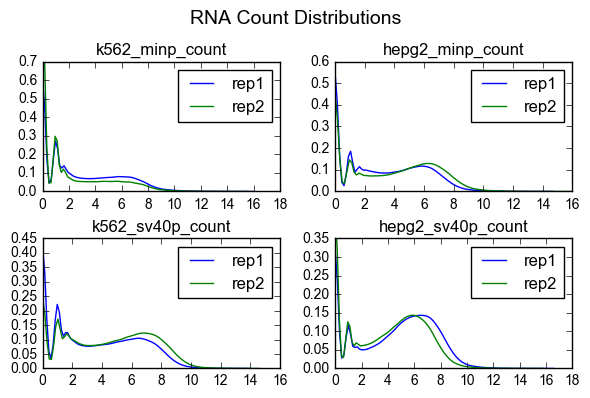

In [74]:
import seaborn as sns

f, ax = plt.subplots(2, 2)

for (i, exp) in enumerate(expNames[:4]):
    ax[i%2, i/2].set_title(exp)

    sns.kdeplot(np.log2(rnaRep1[exp] + 1),
                cut = 0, ax = ax[i%2, i/2], label = 'rep1')
    sns.kdeplot(np.log2(rnaRep2[exp] + 1),
                cut = 0, ax = ax[i%2, i/2], label = 'rep2')

f.suptitle('RNA Count Distributions', fontsize = 14)
plt.tight_layout()
plt.subplots_adjust(top = 0.85)
plt.savefig('../plots/rnaCountDistributions.png')
plt.show()

-3.02156814125 2.30878752326
-3.01774378738 2.31071110968
-0.968363552391 1.81835595873
-0.9646190361 1.82210390134
-1.96938451114 1.91877491996
-1.97124487829 1.91939544717
-0.719344613236 1.55469462823
-0.719890706251 1.55133647426


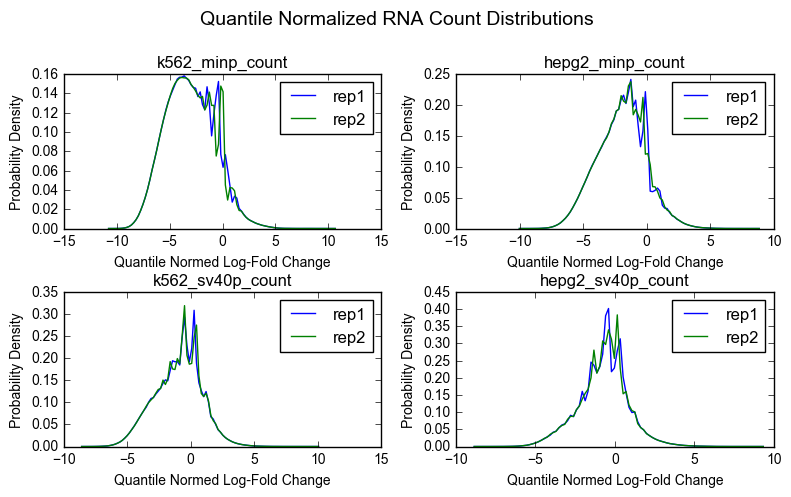

In [176]:
f, ax = plt.subplots(2, 2, figsize=(8,5))

for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(exp)

    data = np.array([np.log2(rnaRep1[exp] + 1) - np.log2(dna[promoter] + 1), 
                     np.log2(rnaRep2[exp] + 1) - np.log2(dna[promoter] + 1)])

    rep1_lfc_norm, rep2_lfc_norm = quantile_normalize(data)
    print np.mean(rep1_lfc_norm), np.std(rep1_lfc_norm)
    print np.mean(rep2_lfc_norm), np.std(rep2_lfc_norm)
    
    sns.kdeplot(rep1_lfc_norm,
                ax = ax[i%2, i/2], label = 'rep1')
    sns.kdeplot(rep2_lfc_norm,
                ax = ax[i%2, i/2], label = 'rep2')
    
    ax[i%2, i/2].set_xlabel('Quantile Normed Log-Fold Change')
    ax[i%2, i/2].set_ylabel('Probability Density')

f.suptitle('Quantile Normalized RNA Count Distributions', fontsize = 14)
plt.tight_layout()
plt.subplots_adjust(top = 0.85)
plt.savefig('../plots/quantileNormedLfcDistributions.png')
plt.show()

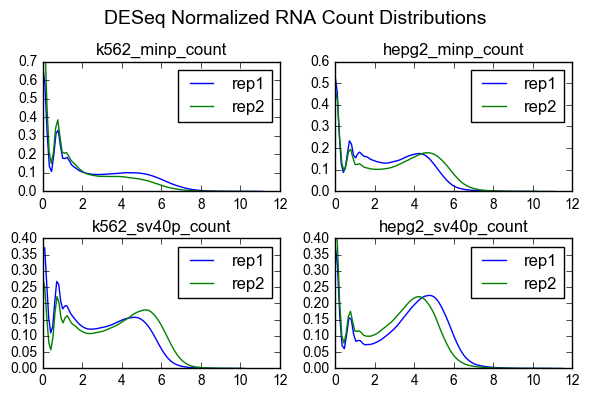

In [76]:
f, ax = plt.subplots(2, 2)

for (i, exp) in enumerate(expNames[:4]):
    ax[i%2, i/2].set_title(exp)

    data = np.array([rnaRep1[exp], rnaRep2[exp]])
#     print np.mean(data[0]), np.std(data[0])
#     print np.mean(data[1]), np.std(data[1])
    
    rep1, rep2 = deseq_normalize(data)
#     print np.mean(rep1), np.std(rep1)
#     print np.mean(rep2), np.std(rep2)
    
    sns.kdeplot(np.log(rep1),
                cut = 0, ax = ax[i%2, i/2], label = 'rep1')
    sns.kdeplot(np.log(rep2),
                cut = 0, ax = ax[i%2, i/2], label = 'rep2')

f.suptitle('DESeq Normalized RNA Count Distributions', fontsize = 14)
plt.tight_layout()
plt.subplots_adjust(top = 0.85)
plt.savefig('../plots/deseqNormedRnaCountDistributions.png')
plt.show()

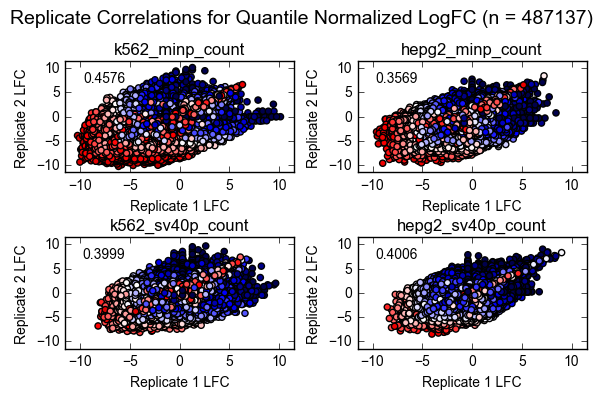

In [188]:
# quantile normalize counts so that both replicate log-fold changes are on same distribution
f, ax = plt.subplots(2, 2)
for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(exp)
    
#     data = np.array([rnaRep1[exp], rnaRep2[exp]])
    rep1 = rnaRep1[exp]
    rep2 = rnaRep2[exp]
    rep1_lfc = np.log2(rep1 + 1) - np.log2(dna[promoter] + 1)
    rep2_lfc = np.log2(rep2 + 1) - np.log2(dna[promoter] + 1)
    rep1_norm, rep2_norm = quantile_normalize([rep1_lfc, rep2_lfc])
    
    ax[i%2, i/2].scatter(rep1_norm,
                         rep2_norm,
                         c = np.log2(dna[promoter] + 1),
                         cmap = 'seismic')
#     g = sns.jointplot(rep1_norm, rep2_norm,
#                   stat_func = spearmanr,
#                   color='blue',
#                   joint_kws={'alpha':0.5, 's':10,
# #                              'c': np.log2(dna[promoter] + 1),
# #                              'cmap': 'seismic',
#                              'edgecolors': 'black'})
#     ax = g.ax_joint
#     ax.set_title(exp)
#     ax.set_xlabel('Replicate 1 LFC')
#     ax.set_ylabel('Replicate 2 LFC')
#     ax.set_xlim([-11, 11])
#     ax.set_ylim([-11, 11])
    spear = stats.spearmanr(rep1_norm,
                            rep2_norm)[0]
    ax[i%2, i/2].set_xlabel('Replicate 1 LFC')
    ax[i%2, i/2].set_ylabel('Replicate 2 LFC')
    ax[i%2, i/2].set_xlim([-11.5, 11.5])
    ax[i%2, i/2].set_ylim([-11.5, 11.5])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=0.5)
    
plt.suptitle("Replicate Correlations for Quantile Normalized LogFC (n = %d)" % len(rnaRep1[exp]), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('../plots/quantileNormedLfcJointplotReplicateCorrelations.png')
plt.show()

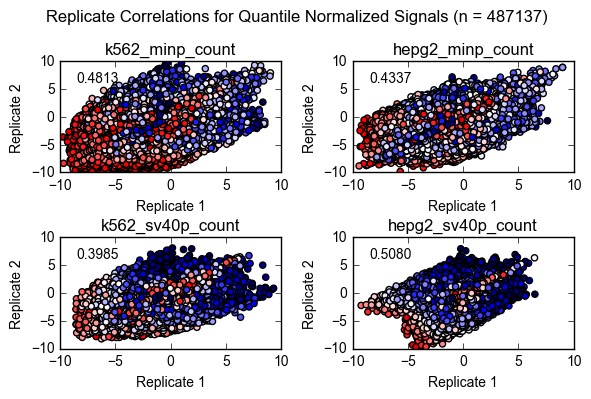

In [158]:
# quantile normalize counts so that both replicates are on same distribution
# np.log2(rna + 1) - np.log2(dna + 1)
f, ax = plt.subplots(2, 2)
for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(exp)
    
    data = np.array([rnaRep1[exp] + 1, rnaRep2[exp] + 1])
    rep1, rep2 = quantile_normalize(data)
    
    rep1_norm = np.log2(rep1) - np.log2(dna_norm + 1)
    rep2_norm = np.log2(rep2) - np.log2(dna_norm + 1)
    
    ax[i%2, i/2].scatter(rep1_norm,
                         rep2_norm,
                         c = np.log2(dna[promoter] + 1),
                         cmap = 'seismic')
    spear = stats.spearmanr(rep1_norm,
                            rep2_norm)[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-10, 10])
    ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=0.5)
    
plt.suptitle("Replicate Correlations for Quantile Normalized Signals (n = %d)" % len(rnaRep1[exp]), fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('../plots/quantileNormedCountWPseudoReplicateCorrelations.png')
plt.show()

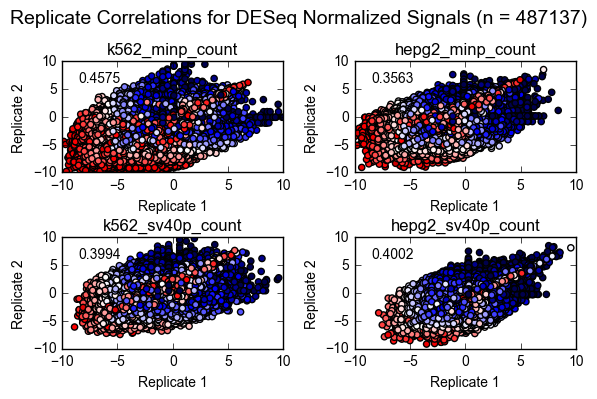

In [157]:
f, ax = plt.subplots(2, 2)
for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(exp)
    
    data = np.array([rnaRep1[exp] + 1, rnaRep2[exp] + 1])
    rep1, rep2 = deseq_normalize(data)
    rep1_norm = np.log2(rep1) - np.log2(dna[promoter] + 1)
    rep2_norm = np.log2(rep2) - np.log2(dna[promoter] + 1)
    
    ax[i%2, i/2].scatter(rep1_norm,
                         rep2_norm,
                         c = np.log2(dna[promoter] + 1),
                         cmap = 'seismic')
    spear = stats.spearmanr(rep1_norm,
                            rep2_norm)[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-10, 10])
    ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=0.5)
    
plt.suptitle("Replicate Correlations for DESeq Normalized Signals (n = %d)" % len(rnaRep1[exp]), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('../plots/deseqCountsNormedReplicateCorrelations.png')
plt.show()

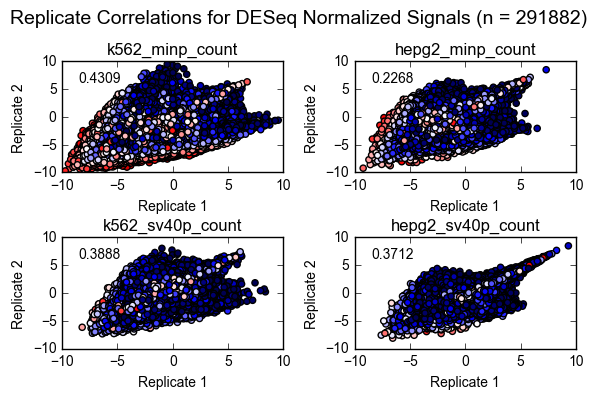

In [86]:
f, ax = plt.subplots(2, 2)
for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(exp)
    
    data = np.array([curate_rna(rnaRep1[exp], dna[promoter] + 1), curate_rna(rnaRep2[exp], dna[promoter] + 1)])
    rep1, rep2 = deseq_normalize(data)
#     rep1, rep2 = data
    rep1_norm = np.log2(rep1) - np.log2(curate_dna(dna[promoter] + 1))
    rep2_norm = np.log2(rep2) - np.log2(curate_dna(dna[promoter] + 1))
#     rep1_norm, rep2_norm = quantile_normalize(np.array([rep1_norm, rep2_norm]))
    
    ax[i%2, i/2].scatter(rep1_norm,
                         rep2_norm,
                         c = np.log2(curate_dna(dna[promoter] + 1)),
                         cmap = 'seismic')
    spear = stats.spearmanr(rep1_norm,
                            rep2_norm)[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-10, 10])
    ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=0.5)
    
plt.suptitle("Replicate Correlations for DESeq Normalized Signals (n = %d)" % len(curate_rna(rnaRep1[exp], dna[promoter])), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('../plots/deseqNormedMinPlasmids20ReplicateCorrelations.png')
plt.show()

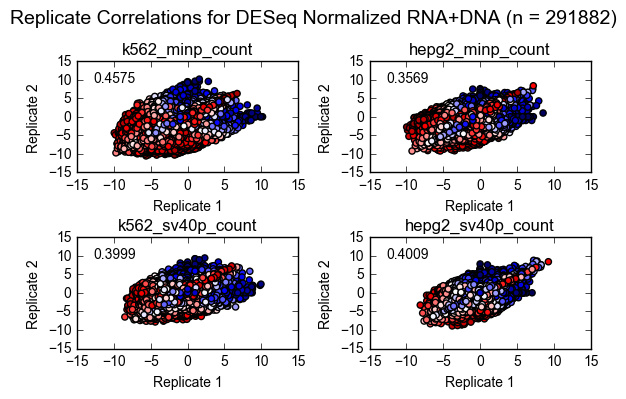

In [91]:
f, ax = plt.subplots(2, 2)
for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(exp)
    
    data = np.array([rnaRep1[exp], rnaRep2[exp], dna[promoter]])
    rep1, rep2, dna_norm = deseq_normalize(data)
#     rep1, rep2 = data
    rep1_norm = np.log2(rep1) - np.log2(dna_norm)
    rep2_norm = np.log2(rep2) - np.log2(dna_norm)
#     rep1_norm, rep2_norm = quantile_normalize(np.array([rep1_norm, rep2_norm]))
    
    ax[i%2, i/2].scatter(rep1_norm,
                         rep2_norm,
                         c = np.log2(dna_norm),
                         cmap = 'seismic')
    spear = stats.spearmanr(rep1_norm,
                            rep2_norm)[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-15, 15])
    ax[i%2, i/2].set_ylim([-15, 15])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=0.5)
    
plt.suptitle("Replicate Correlations for DESeq Normalized RNA+DNA (n = %d)" % len(curate_rna(rnaRep1[exp], dna[promoter])), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('../plots/deseqNormedRnaDnaReplicateCorrelations.png')
plt.show()

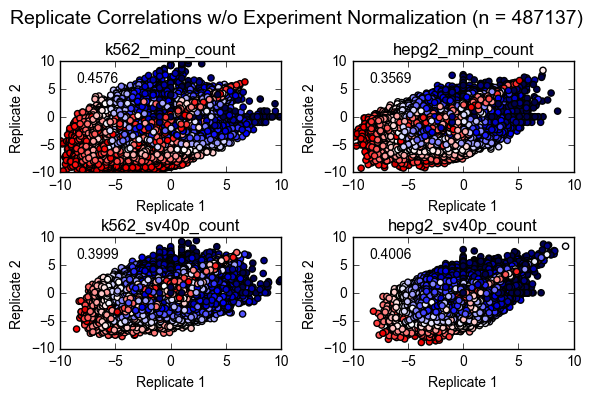

In [88]:
f, ax = plt.subplots(2, 2)
for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(exp)
    
    rep1, rep2 = np.array([rnaRep1[exp], rnaRep2[exp]])
    rep1_norm = np.log2(rep1 + 1) - np.log2(dna[promoter] + 1)
    rep2_norm = np.log2(rep2 + 1) - np.log2(dna[promoter] + 1)
    
    ax[i%2, i/2].scatter(rep1_norm,
                         rep2_norm,
                         c = np.log2(dna[promoter] + 1),
                         cmap = 'seismic')
    spear = stats.spearmanr(rep1_norm,
                            rep2_norm)[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-10, 10])
    ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.subplots_adjust(hspace=0.5)
    
plt.suptitle("Replicate Correlations w/o Experiment Normalization (n = %d)" % len(rnaRep1[exp]), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('../plots/unnormedReplicateCorrelations.png')
plt.show()

In [167]:
# Systematic comparison of normalization methods
from scipy.stats import spearmanr

data = {exp: [rnaRep1[exp], rnaRep2[exp]] for exp in expNames[:4]}
for (i, exp) in enumerate(expNames[:4]):
    prom = exp.split('_')[1]
    print exp
    rep1Counts = data[exp][0]
    rep2Counts = data[exp][1]
    sumRna1 = np.sum(rep1Counts + 1)
    sumRna2 = np.sum(rep2Counts + 1)
    sumDna = np.sum(dna[prom] + 1)
    noNormLfc = spearmanr(np.log2(rep1Counts + 1) - np.log2(dna[prom] + 1), 
                          np.log2(rep2Counts + 1) - np.log2(dna[prom] + 1))
    totalReadNorm = spearmanr(np.log2((rep1Counts + 1) / sumRna1) - np.log2((dna[prom] + 1) / sumDna), 
                          np.log2((rep2Counts + 1) / sumRna2) - np.log2((dna[prom] + 1) / sumDna))
    quantNormedCounts = quantile_normalize(np.array([rep1Counts, rep2Counts]))
    quantNormed = spearmanr(np.log2(quantNormedCounts[0] + 1) - np.log2(dna[prom] + 1),
                            np.log2(quantNormedCounts[1] + 1) - np.log2(dna[prom] + 1))
    quantNormedDnaCounts = quantile_normalize(np.array([rep1Counts, rep2Counts, dna[prom]]))
    quantNormedDna = spearmanr(np.log2(quantNormedDnaCounts[0] + 1) - np.log2(quantNormedDnaCounts[2] + 1),
                            np.log2(quantNormedDnaCounts[1] + 1) - np.log2(quantNormedDnaCounts[2] + 1))
    quantNormedCountsWPseudo = quantile_normalize(np.array([rep1Counts+1, rep2Counts+1]))
    quantNormedWPseudo = spearmanr(np.log2(quantNormedCountsWPseudo[0]) - np.log2(dna[prom] + 1),
                                   np.log2(quantNormedCountsWPseudo[1]) - np.log2(dna[prom] + 1))
    quantNormedLfc = quantile_normalize([np.log2(rep1Counts + 1) - np.log2(dna[prom] + 1), 
                                         np.log2(rep2Counts + 1) - np.log2(dna[prom] + 1)])
    quantNormedLfcCorr = spearmanr(quantNormedLfc[0], quantNormedLfc[1])
    deseqNormedCounts = deseq_normalize(np.array([rep1Counts+1, rep2Counts+1]))
    deseqNormedLfc = spearmanr(np.log2(deseqNormedCounts[0]) - np.log2(dna[prom] + 1),
                               np.log2(deseqNormedCounts[1]) - np.log2(dna[prom] + 1))
    print "LogFC w/o between-sample normalization %.3f" % noNormLfc[0]
    print "LogFC total read normalization %.3f" % totalReadNorm[0]
    print "Quantile normalized read counts w/o pseudocount %.3f" % quantNormed[0]
    print "Quantile normalized rna and dna counts w/o pseudocount %.3f" % quantNormedDna[0]
    print "Quantile normalized read counts w/ pseudocount %.3f" % quantNormedWPseudo[0]
    print "Quantile normalized logfoldchanges %.3f" % quantNormedLfcCorr[0]
    print "DESeq normalized counts w/o pseudocount %.3f" % deseqNormedLfc[0]
    print '\n'

k562_minp_count
LogFC w/o between-sample normalization 0.458
LogFC total read normalization 0.458
Quantile normalized read counts w/o pseudocount 0.462
Quantile normalized rna and dna counts w/o pseudocount 0.260
Quantile normalized read counts w/ pseudocount 0.462
Quantile normalized logfoldchanges 0.458
DESeq normalized counts w/o pseudocount 0.458


k562_sv40p_count
LogFC w/o between-sample normalization 0.400
LogFC total read normalization 0.400
Quantile normalized read counts w/o pseudocount 0.401
Quantile normalized rna and dna counts w/o pseudocount 0.344
Quantile normalized read counts w/ pseudocount 0.401
Quantile normalized logfoldchanges 0.400
DESeq normalized counts w/o pseudocount 0.399


hepg2_minp_count
LogFC w/o between-sample normalization 0.357
LogFC total read normalization 0.357
Quantile normalized read counts w/o pseudocount 0.366
Quantile normalized rna and dna counts w/o pseudocount 0.262
Quantile normalized read counts w/ pseudocount 0.366
Quantile normalized lo

# Quantile norming correctly accounting for the two experiment designs

In [297]:
design1_idxs = []
design2_idxs = []
for (i, design) in enumerate(designs):
    if design == '1':
        design1_idxs.append(i)
    if design == '2':
        design2_idxs.append(i)
        
design1_idxs = np.array(design1_idxs)
design2_idxs = np.array(design2_idxs)
print design1_idxs.shape
print design2_idxs.shape

(243573,)
(243564,)


In [315]:
from scipy.stats import spearmanr, zscore

data = {exp: np.array([rnaRep1[exp], rnaRep2[exp]]) for exp in expNames[:4]}
for (i, exp) in enumerate(expNames[:4]):
    prom = exp.split('_')[1]
#     rep1Counts_1 = data[exp][0][design1_idxs]#[:243564]
#     rep1Counts_2 = data[exp][0][design2_idxs]
#     rep2Counts_1 = data[exp][1][design1_idxs]#[:243564]
#     rep2Counts_2 = data[exp][1][design2_idxs]
    
#     qnormed = deseq_normalize([rep1Counts_1, rep1Counts_2,
#                                rep2Counts_1, rep2Counts_2])
#     rep1_qnorm = np.concatenate((qnormed[0], qnormed[1]))
#     rep2_qnorm = np.concatenate((qnormed[2], qnormed[3]))
#     sumRna1 = np.sum(rep1Counts + 1)
#     sumRna2 = np.sum(rep2Counts + 1)
#     sumDna = np.sum(dna[prom] + 1)
    rep1Counts = data[exp][0]
    rep2Counts = data[exp][1]
    noNormLfc = np.array([np.log2(rep1Counts + 1) - np.log2(dna[prom] + 1), 
                          np.log2(rep2Counts + 1) - np.log2(dna[prom] + 1),
                          np.log2(rep1Counts + rep2Counts + 1 + 1) - np.log2(2*(dna[prom] + 1))
                         ])
#     print spearmanr(rep1Norm, noNormLfc[0])
    noNormLfc[2] = (noNormLfc[0] + noNormLfc[1]) / 2.0
    noNormLfc = zscore(noNormLfc, axis = 1)
#     print "LogFC w/o between-sample normalization, Rep1 vs. Rep2 %.3f" % spearmanr(noNormLfc[0], noNormLfc[1])[0]
#     print "LogFC w/ quantile normalization, Rep1 vs. Rep2 %.3f" % spearmanr(rep1_qnorm, rep2_qnorm)[0]
    print "LogFC w/o between-sample normalization, Rep1 vs. Rep2 %.3f" % spearmanr(noNormLfc[0], noNormLfc[1])[0]
    print "LogFC w/o between-sample normalization, Rep1 vs. PoolAvg %.3f" % spearmanr(noNormLfc[0], noNormLfc[2])[0]
    print "LogFC w/o between-sample normalization, Rep2 vs. PoolAvg %.3f" % spearmanr(noNormLfc[1], noNormLfc[2])[0]
    print '\n'

LogFC w/o between-sample normalization, Rep1 vs. Rep2 0.458
LogFC w/o between-sample normalization, Rep1 vs. PoolAvg 0.830
LogFC w/o between-sample normalization, Rep2 vs. PoolAvg 0.863


LogFC w/o between-sample normalization, Rep1 vs. Rep2 0.400
LogFC w/o between-sample normalization, Rep1 vs. PoolAvg 0.847
LogFC w/o between-sample normalization, Rep2 vs. PoolAvg 0.805


LogFC w/o between-sample normalization, Rep1 vs. Rep2 0.357
LogFC w/o between-sample normalization, Rep1 vs. PoolAvg 0.833
LogFC w/o between-sample normalization, Rep2 vs. PoolAvg 0.790


LogFC w/o between-sample normalization, Rep1 vs. Rep2 0.401
LogFC w/o between-sample normalization, Rep1 vs. PoolAvg 0.802
LogFC w/o between-sample normalization, Rep2 vs. PoolAvg 0.840




In [283]:
exp = 'k562_minp_count'
rep1ct = rnaRep1[exp]
rep2ct = rnaRep2[exp]
dnapr = dna['minp']
sum1 = sum(rep1ct + 1)
sum2 = sum(rep2ct + 1)
sumd = sum(dnapr + 1)
norm_rep1 = np.ndarray(len(rep1ct))
norm_rep2 = np.ndarray(len(rep2ct))
for i in range(len(rep1ct)):
    norm_rep1[i] = np.log2(rep1ct[i] + 1) - np.log2(dnapr[i] + 1) - np.log2(sum1) + np.log2(sumd)
    norm_rep2[i] = np.log2(rep2ct[i] + 1) - np.log2(dnapr[i] + 1) - np.log2(sum2) + np.log2(sumd)
    
print spearmanr(norm_rep1, norm_rep2)

SpearmanrResult(correlation=0.45755445166902503, pvalue=0.0)


In [287]:
exp = 'k562_minp_norm'
rep1ct = rnaRep1[exp]
rep2ct = rnaRep2[exp]
print spearmanr(rep1ct, rep2ct)

SpearmanrResult(correlation=0.47268933268946384, pvalue=0.0)


In [169]:
print np.mean(quantNormedLfc[0]), np.mean(quantNormedLfc[1])
print np.std(quantNormedLfc[0]), np.std(quantNormedLfc[1])

-0.719344613236 -0.719890706251
1.55469462823 1.55133647426


# Prepare file for IDR

In [209]:
from collections import OrderedDict

dataMatrix = open('../data/processed_data/sharprFullDataMatrix.tsv')
header = dataMatrix.readline()
header = header.strip().split('\t')
cols_to_indices = {col: header.index(col) for col in header}
print header

rep1Names = ['k562_minp_rep1_count', 'k562_sv40p_rep1_count',
             'hepg2_minp_rep1_count', 'hepg2_sv40p_rep1_count',
             'k562_minp_rep1_norm', 'k562_sv40p_rep1_norm',
             'hepg2_minp_rep1_norm', 'hepg2_sv40p_rep1_norm'
            ]
rep2Names = ['k562_minp_rep2_count', 'k562_sv40p_rep2_count',
             'hepg2_minp_rep2_count', 'hepg2_sv40p_rep2_count',
             'k562_minp_rep2_norm', 'k562_sv40p_rep2_norm',
             'hepg2_minp_rep2_norm', 'hepg2_sv40p_rep2_norm'
            ]
avgNames = ['k562_minp_avg_count', 'k562_sv40p_avg_count',
             'hepg2_minp_avg_count', 'hepg2_sv40p_avg_count',
             'k562_minp_avg_norm', 'k562_sv40p_avg_norm',
             'hepg2_minp_avg_norm', 'hepg2_sv40p_avg_norm'
            ]
expNames = ['k562_minp_count', 'k562_sv40p_count',
            'hepg2_minp_count', 'hepg2_sv40p_count',
            'k562_minp_norm', 'k562_sv40p_norm',
            'hepg2_minp_norm', 'hepg2_sv40p_norm'
            ]
dnaNames = ['minp', 'sv40p']
names = []
# rnaRep1, rnaRep2, rnaAvg, dna = [OrderedDict() for i in range(4)]
rnaRep1 = OrderedDict([(exp, []) for exp in expNames])
rnaRep2 = OrderedDict([(exp, []) for exp in expNames])
rnaAvg = OrderedDict([(exp, []) for exp in expNames])
dna = OrderedDict([(exp, []) for exp in dnaNames])
j = 0
for line in dataMatrix:
    line = line.strip().split('\t')
    names.append(line[cols_to_indices['name']])
    for data_dict in [rnaRep1, rnaRep2, rnaAvg, dna]:
        for (i, measurement) in enumerate(data_dict.keys()):
            if data_dict is rnaRep1:
                measurement_rep = rep1Names[i]
            if data_dict is rnaRep2:
                measurement_rep = rep2Names[i]
            if data_dict is rnaAvg:
                measurement_rep = avgNames[i]
            if data_dict is dna:
                if measurement == 'minp':
                    measurement_rep = 'dna_minp_count'
                else:
                    measurement_rep = 'dna_sv40p_count'
            data_dict[measurement].append(float(line[cols_to_indices[measurement_rep]]))

['name', 'chrom', 'center_coord', 'sequence', 'barcode', 'chromatin_state', 'design', 'k562_minp_rep1_count', 'k562_minp_rep2_count', 'k562_minp_avg_count', 'k562_sv40p_rep1_count', 'k562_sv40p_rep2_count', 'k562_sv40p_avg_count', 'hepg2_minp_rep1_count', 'hepg2_minp_rep2_count', 'hepg2_minp_avg_count', 'hepg2_sv40p_rep1_count', 'hepg2_sv40p_rep2_count', 'hepg2_sv40p_avg_count', 'k562_minp_rep1_norm', 'k562_minp_rep2_norm', 'k562_minp_avg_norm', 'k562_sv40p_rep1_norm', 'k562_sv40p_rep2_norm', 'k562_sv40p_avg_norm', 'hepg2_minp_rep1_norm', 'hepg2_minp_rep2_norm', 'hepg2_minp_avg_norm', 'hepg2_sv40p_rep1_norm', 'hepg2_sv40p_rep2_norm', 'hepg2_sv40p_avg_norm', 'dna_minp_count', 'dna_sv40p_count']


In [210]:
rnaRep1 = OrderedDict([(measurement, np.array(rnaRep1[measurement])) for measurement in rnaRep1.keys()])
rnaRep2 = OrderedDict([(measurement, np.array(rnaRep2[measurement])) for measurement in rnaRep2.keys()])
rnaAvg = OrderedDict([(measurement, np.array(rnaAvg[measurement])) for measurement in rnaAvg.keys()])
dna = OrderedDict([(measurement, np.array(dna[measurement])) for measurement in dna.keys()])

print type(dna['minp'])

<type 'numpy.ndarray'>


In [211]:
sharpr_rep1 = {}
sharpr_rep2 = {}

for (i, exp) in enumerate(expNames[:4]):
    prom = exp.split('_')[1]
    rep1Counts = rnaRep1[exp]
    rep2Counts = rnaRep2[exp]
#     print len(rep1Counts)
#     print np.sum(rep1Counts <= -1)
    quantNormedLfc = quantile_normalize([np.log2(rep1Counts + 1) - np.log2(dna[prom] + 1), 
                                         np.log2(rep2Counts + 1) - np.log2(dna[prom] + 1)])
#     quantNormedLfcCorr = spearmanr(quantNormedLfc[0], quantNormedLfc[1])
    exp_name = ''.join(exp.split('_')[:2])
    sharpr_rep1[exp_name] = []
    sharpr_rep2[exp_name] = []
    for (j, name) in enumerate(names):
        chrom = name.split('_')[4]
        frag_index = int(name.split('_')[3])
        pseudo_chrom = 'chr' + str(i)
        pseudo_start = str(j)
        pseudo_end = str(j+1)
        sharpr_rep1[exp_name].append([pseudo_chrom, pseudo_start, pseudo_end,
                            name, quantNormedLfc[0][j], '.',
                            0, 0, 0])
        sharpr_rep2[exp_name].append([pseudo_chrom, pseudo_start, pseudo_end,
                            name, quantNormedLfc[1][j], '.',
                            0, 0, 0])
        
sharpr_rep1 = {exp_name: np.array(sharpr_rep1[exp_name]) for exp_name in sharpr_rep1}
sharpr_rep2 = {exp_name: np.array(sharpr_rep2[exp_name]) for exp_name in sharpr_rep2}

In [204]:
k = 3
spearmanr(sharpr_rep1[:, 4].astype(np.float)[487137*k:487137*(k+1)], 
          sharpr_rep2[:, 4].astype(np.float)[487137*k:487137*(k+1)])
spearmanr(sharpr_rep1[:, 4].astype(np.float), 
          sharpr_rep2[:, 4].astype(np.float))
sharpr_rep1[:10]

array([['chr0', '0', '1', 'H1hesc_1_0_0_chr20_30310735', '-7.2073426179',
        '.', '0', '0', '0'],
       ['chr0', '1', '2', 'H1hesc_1_0_1_chr20_30310735', '-4.47709815519',
        '.', '0', '0', '0'],
       ['chr0', '2', '3', 'H1hesc_1_0_2_chr20_30310735', '-0.368482797083',
        '.', '0', '0', '0'],
       ['chr0', '3', '4', 'H1hesc_1_0_3_chr20_30310735', '-3.64960400919',
        '.', '0', '0', '0'],
       ['chr0', '4', '5', 'H1hesc_1_0_4_chr20_30310735', '-3.48736662069',
        '.', '0', '0', '0'],
       ['chr0', '5', '6', 'H1hesc_1_0_5_chr20_30310735', '-2.46536866878',
        '.', '0', '0', '0'],
       ['chr0', '6', '7', 'H1hesc_1_0_6_chr20_30310735', '-3.94284818667',
        '.', '0', '0', '0'],
       ['chr0', '7', '8', 'H1hesc_1_0_7_chr20_30310735', '-2.79747329465',
        '.', '0', '0', '0'],
       ['chr0', '8', '9', 'H1hesc_1_0_8_chr20_30310735', '-2.87744375108',
        '.', '0', '0', '0'],
       ['chr0', '9', '10', 'H1hesc_1_0_9_chr20_30310735', '-5.89

In [212]:
from scipy.stats import rankdata

for exp_name in sharpr_rep1:
    sharpr_rep1[exp_name][:, 4] = len(sharpr_rep1[exp_name]) - rankdata(sharpr_rep1[exp_name][:, 4].astype(np.float))
    sharpr_rep2[exp_name][:, 4] = len(sharpr_rep1[exp_name]) - rankdata(sharpr_rep2[exp_name][:, 4].astype(np.float))

In [213]:
header1 = 'chr\tstart\tend\tname\tsignal\tstrand\tfill1\tfill2\tfill3\n'
header2 = 'chr\tstart\tend\tname\tsignal\tstrand\tfill1\tfill2\tfill3\n'
for exp_name in sharpr_rep1:
    np.savetxt(fname = '../data/idr/idrSharprFragmentsQuantileNormedRanks' + exp_name +
                       'Replicate1.bed',
               fmt = '%s',
               X = sharpr_rep1[exp_name],
               delimiter = '\t', 
               header = header1,
               comments='# ')
    np.savetxt(fname = '../data/idr/idrSharprFragmentsQuantileNormedRanks' + exp_name +
                       'Replicate2.bed',
               fmt = '%s',
               X = sharpr_rep2[exp_name],
               delimiter = '\t', 
               header = header2,
               comments='# ')